In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# loading the data
dataset = pd.read_csv("SuperStoreUS.csv", encoding="latin1")
dataset.head(3)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,1/7/2015,1/8/2015,4.5600,4,13.01,88522
1,20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,...,West,California,San Gabriel,91776,6/13/2015,6/15/2015,4390.3665,12,6362.85,90193
2,21776,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,...,East,New Jersey,Roselle,7203,2/15/2015,2/17/2015,-53.8096,22,211.15,90192


C:\Users\Jeetendra\AppData\Local\Temp\ipykernel_15688\337650667.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Unit Price'])


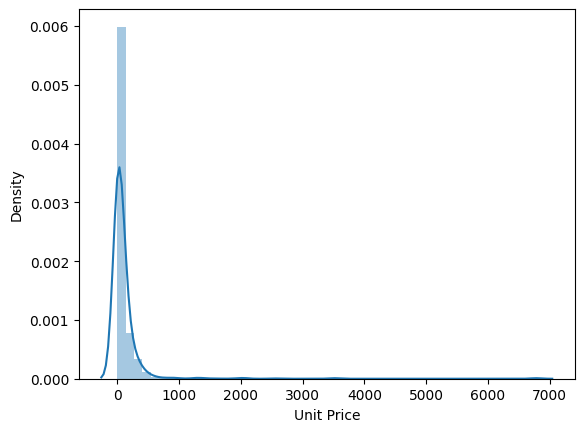

In [5]:
# checking the distribution of the data
sns.distplot(dataset['Unit Price'])
plt.show()

In [7]:
# removing the outliers using IQR method

q1 = dataset['Unit Price'].quantile(0.25)
q3 = dataset['Unit Price'].quantile(0.75)
iqr = q3 - q1

In [10]:
# getting the max and min range
max_range = q3 + (1.5 * iqr)
min_range = q1 - (1.5 * iqr)
min_range, max_range

(np.float64(-135.25875), np.float64(242.71124999999998))

In [11]:
# now removing the outlier

dataset = dataset[dataset['Unit Price']< max_range]
dataset.shape

(1776, 25)

C:\Users\Jeetendra\AppData\Local\Temp\ipykernel_15688\3283468422.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Unit Price'])


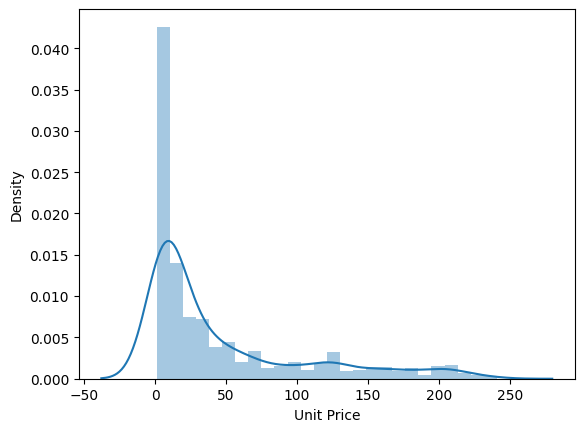

In [13]:
# now check the distribution curv

sns.distplot(dataset['Unit Price'])
plt.show() 

# this is not a normal distribution,

In [15]:
# now convert this to normal distribution

from sklearn.preprocessing import FunctionTransformer

ft = FunctionTransformer(func=np.log1p)
dataset['Unit Price TF'] = ft.fit_transform(dataset[['Unit Price']])

C:\Users\Jeetendra\AppData\Local\Temp\ipykernel_15688\3454853020.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Unit Price'])


C:\Users\Jeetendra\AppData\Local\Temp\ipykernel_15688\3454853020.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Unit Price TF'])


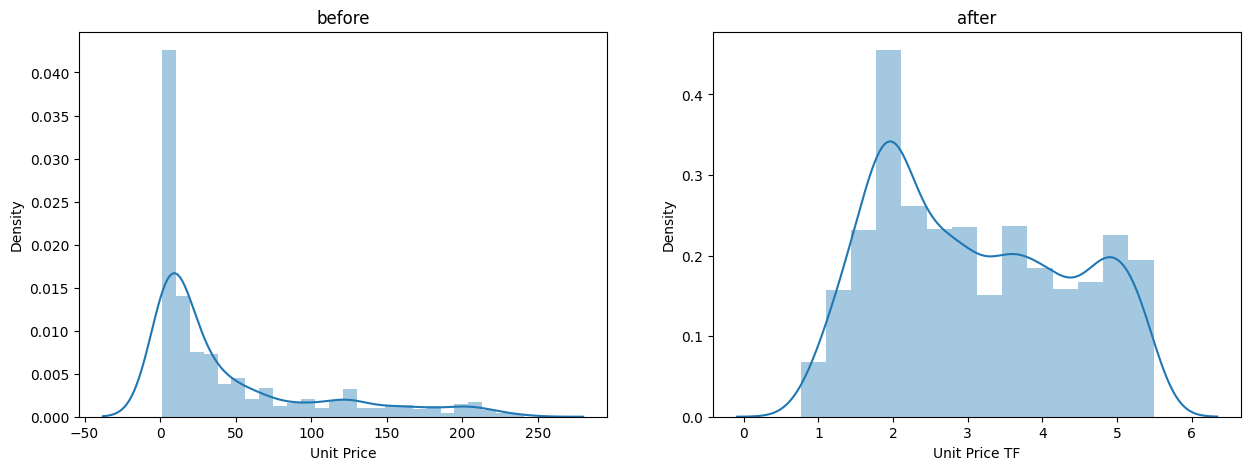

In [20]:
# plot the data
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.title("before")
sns.distplot(dataset['Unit Price'])

plt.subplot(1,2,2)
plt.title("after")
sns.distplot(dataset['Unit Price TF'])

plt.show()